<a href="https://colab.research.google.com/github/PoserioJed/CCINCOML_EXERCISES_COM23P/blob/main/Copy_of_Exercise4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exercise 4: Hate Speech Classification using Multinomial Naive Bayes

Instructions:
- You do not need to split your data. Use the training, validation and test sets provided below.
- Use Multinomial Naive Bayes to train a model that can classify if a sentence is a hate speech or non-hate speech
- A sentence with a label of zero (0) is classified as non-hate speech
- A sentence with a label of one (1) is classified as a hate speech

Apply text pre-processing techniques such as
- Converting to lowercase
- Stop word Removal
- Removal of digits, special characters
- Stemming or Lemmatization but not both
- Count Vectorizer or TF-IDF Vectorizer but not both

Evaluate your model by:
- Providing input by yourself
- Creating a Confusion Matrix
- Calculating the Accuracy, Precision, Recall and F1-Score

In [1]:
import pandas as pd

In [2]:
splits = {'train': 'unique_train_dataset.csv', 'validation': 'unique_validation_dataset.csv', 'test': 'unique_test_dataset.csv'}

**Training Set**

Use this to train your model

In [3]:
df_train = pd.read_csv("hf://datasets/mapsoriano/2016_2022_hate_speech_filipino/" + splits["train"])

/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


**Validation Set**

Use this set to evaluate your model

In [4]:
df_validation = pd.read_csv("hf://datasets/mapsoriano/2016_2022_hate_speech_filipino/" + splits["validation"])

**Test Set**
  
Use this set to test your model

In [5]:
df_test = pd.read_csv("hf://datasets/mapsoriano/2016_2022_hate_speech_filipino/" + splits["test"])

## A. Understanding your training data

1. Check the first 10 rows of the training dataset

In [30]:
df_train.head(10)

,text,label
0,Presidential candidate Mar Roxas implies that ...,1
1,Parang may mali na sumunod ang patalastas ng N...,1
2,Bet ko. Pula Ang Kulay Ng Posas,1
3,[USERNAME] kakampink,0
4,Bakit parang tahimik ang mga PINK about Doc Wi...,1
5,"""Ang sinungaling sa umpisa ay sinungaling hang...",1
6,Leni Kiko,0
7,Nahiya si Binay sa Makati kaya dito na lang sa...,1
8,Another reminderHalalan,0
9,[USERNAME] Maybe because VP Leni Sen Kiko and ...,0


2. Check how many rows and columns are in the training dataset using `.info()`

In [31]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21773 entries, 0 to 21772
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    21773 non-null  object
 1   label   21773 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 340.3+ KB


3. Check for NaN values

In [32]:
df_train.isnull().sum()

,0
text,0
label,0


4. Check for duplicate rows

In [33]:
df_train.duplicated().sum()

np.int64(0)

5. Check how many rows belong to each class

In [34]:
df_train['label'].value_counts()

,count
label,
1,10994
0,10779


## B. Text pre-processing

6. Remove duplicate rows

In [36]:
df_train.drop_duplicates(inplace=True)
df_train.reset_index(drop=True, inplace=True)
df_train.duplicated().sum()

np.int64(0)

7. Remove rows with NaN values

In [37]:
df = df_train.dropna()
df.isnull().sum()

,0
text,0
label,0


8. Convert all text to lowercase

In [38]:
df['text'] = df['text'].str.lower()
df.head()

,text,label
0,presidential candidate mar roxas implies that ...,1
1,parang may mali na sumunod ang patalastas ng n...,1
2,bet ko. pula ang kulay ng posas,1
3,[username] kakampink,0
4,bakit parang tahimik ang mga pink about doc wi...,1


9. Remove digits, URLS and special characters

In [51]:
df['text'] = df['text'].str.replace('[^a-zA-Z]', '', regex=True)
df['text'] = df['text'].str.replace('http\S+/www.\S+', '', regex=True)
df.head()

<>:2: SyntaxWarning: invalid escape sequence '\S'
<>:2: SyntaxWarning: invalid escape sequence '\S'
/tmp/ipython-input-3060031276.py:2: SyntaxWarning: invalid escape sequence '\S'
  df['text'] = df['text'].str.replace('http\S+/www.\S+', '', regex=True)


,text,label
0,presidentialcandidatemarroxasimpliesthatthegov...,1
1,parangmaymalinasumunodangpatalastasngnescafcof...,1
2,betkopulaangkulayngposas,1
3,usernamekakampink,0
4,bakitparangtahimikangmgapinkaboutdocwillieongn...,1


10. Remove stop words

In [52]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stop = stopwords.words('english')

df['text'] = df['text'].apply(lambda x: ''.join([word for word in x.split() if word not in (stop)]))
df.head()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,text,label
0,presidentialcandidatemarroxasimpliesthatthegov...,1
1,parangmaymalinasumunodangpatalastasngnescafcof...,1
2,betkopulaangkulayngposas,1
3,usernamekakampink,0
4,bakitparangtahimikangmgapinkaboutdocwillieongn...,1


11. Use Stemming or Lemmatization

In [53]:
from nltk.stem import WordNetLemmatizer
import nltk
nltk.download('wordnet')
lemmatizer = WordNetLemmatizer()
df['text'] = df['text'].apply(lambda x: ''.join([lemmatizer.lemmatize(word) for word in x.split()]))
df.head()

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


,text,label
0,presidentialcandidatemarroxasimpliesthatthegov...,1
1,parangmaymalinasumunodangpatalastasngnescafcof...,1
2,betkopulaangkulayngposas,1
3,usernamekakampink,0
4,bakitparangtahimikangmgapinkaboutdocwillieongn...,1


## C. Training your model

12. Put all text training data in variable **X_train**

In [49]:
X_train = df['text']


13. Put all training data labels in variable **y_train**

In [50]:
y_train = df['label']


14. Use `CountVectorizer()` or `TfidfVectorizer()` to convert text data to its numerical form.

Put the converted data to **X_train_transformed** variable

In [56]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()
X_train_transformed = vectorizer.fit_transform(X_train)

15. Create an instance of `MultinomalNB()`

In [57]:
from sklearn.naive_bayes import MultinomialNB
model = MultinomialNB()

16. Train the model using `.fit()`

In [58]:
model.fit(X_train_transformed, y_train)

MultinomialNB()

## D. Evaluate your model

17. Use `.predict()` to generate model predictions using the **validation dataset**


- Put all text validation data in **X_validation** variable

- Convert **X_validation** to its numerical form.

- Put the converted data to **X_validation_transformed**

- Put all predictions in **y_validation_pred** variable

In [59]:
X_validation = df_validation['text']
X_validation_transformed = vectorizer.transform(X_validation)
y_validation_pred = model.predict(X_validation_transformed)

18. Get the Accuracy, Precision, Recall and F1-Score of the model using the **validation dataset**

- Put all validation data labels in **y_validation** variable

In [60]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
y_validation = df_validation['label']
accuracy = accuracy_score(y_validation, y_validation_pred)
precision = precision_score(y_validation, y_validation_pred)
recall = recall_score(y_validation, y_validation_pred)
f1 = f1_score(y_validation, y_validation_pred)
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Accuracy: 0.5410714285714285
Precision: 0.5895316804407713
Recall: 0.30247349823321557
F1 Score: 0.39981317141522654


19. Create a confusion matrix using the **validation dataset**

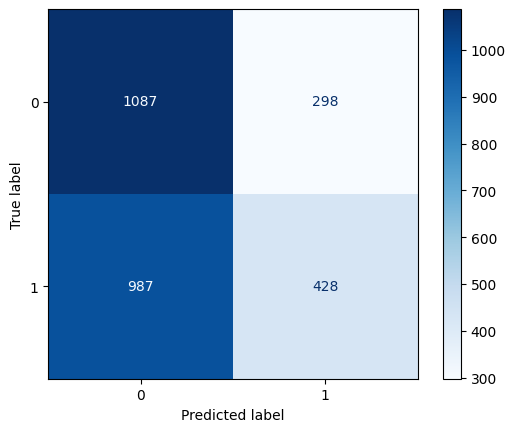

In [61]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
cm = confusion_matrix(y_validation, y_validation_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.show()

20. Use `.predict()` to generate the model predictions using the **test dataset**


- Put all text validation data in **X_test** variable

- Convert **X_test** to its numerical form.

- Put the converted data to **X_test_transformed**

- Put all predictions in **y_test_pred** variable

In [62]:
X_test = df_test['text']
X_test_transformed = vectorizer.transform(X_test)
y_test_pred = model.predict(X_test_transformed)

21. Get the Accuracy, Precision, Recall and F1-Score of the model using the **test dataset**

- Put all test data labels in **y_validation** variable



In [63]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
y_test = df_test['label']

accuracy = accuracy_score(y_test, y_test_pred)
precision = precision_score(y_test, y_test_pred, average='weighted')
recall = recall_score(y_test, y_test_pred, average='weighted')
f1 = f1_score(y_test, y_test_pred, average='weighted')

print("Test Accuracy:", accuracy)
print("Test Precision:", precision)
print("Test Recall:", recall)
print("Test F1 Score:", f1)

Test Accuracy: 0.5156583629893239
Test Precision: 0.5184259064136244
Test Recall: 0.5156583629893239
Test F1 Score: 0.48824702237006096


22. Create a confusion matrix using the **test dataset**

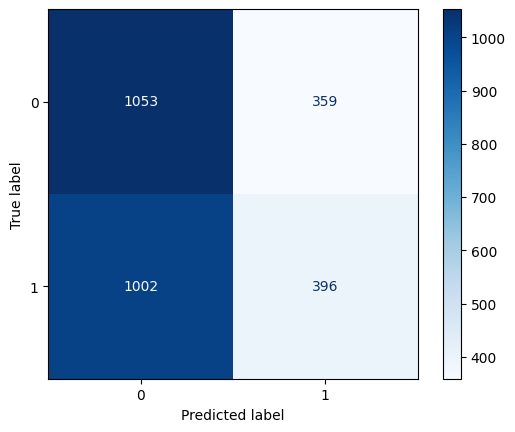

In [64]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_test_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.show()

## E. Test the model

23. Test the model by providing a non-hate speech input. The model should predict it as 0

In [71]:
test_input_non_hate = ["This is a nice message."]
test_input_non_hate_transformed = vectorizer.transform(test_input_non_hate)
pred_non_hate = model.predict(test_input_non_hate_transformed)
print("Prediction for non-hate speech:", pred_non_hate[0])

Prediction for non-hate speech: 1


24. Test the model by providing a hate speech input. The model should predict it as 1

In [68]:
test_input_hate = ["I hate you and people like you!"]
test_input_hate_transformed = vectorizer.transform(test_input_hate)
pred_hate = model.predict(test_input_hate_transformed)
print("Prediction for hate speech:", pred_hate[0])

Prediction for hate speech: 1
